In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori
import warnings

warnings.filterwarnings('ignore')

In [2]:
sheet1 = pd.read_excel('data.xlsx', 0)
sheet2 = pd.read_excel('data.xlsx', 1)

In [3]:
db = pd.concat([sheet1, sheet2])

In [4]:
db = pd.read_excel('data.xlsx')
db.to_csv('data.csv', index=False)

In [5]:
db.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
db.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [7]:
db.shape

(525461, 8)

In [8]:
db.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [9]:
db.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [10]:
db.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
525456    False
525457    False
525458    False
525459    False
525460    False
Length: 525461, dtype: bool

In [11]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [12]:
db.dropna(inplace=True)

In [13]:
db.shape

(417534, 8)

In [14]:
db.nunique()

Invoice        23587
StockCode       4031
Description     4459
Quantity         500
InvoiceDate    21786
Price            664
Customer ID     4383
Country           37
dtype: int64

In [15]:
#There is no target varibale for clustering
#Dropped non values as there is a sufficient amount of data to work with

In [16]:
first = [489434,12,2.95, 17530.0]
second = [489434,12,6.75, 13085.0]
total = 0
for i in range(len(first)):
    print((first[i]-second[i])**2)
    total += (first[i]-second[i])**2
total ** 0.5

0
0
14.44
19758025.0


4445.001624296667

Extremely far away due to the last feature.

In [17]:
db.drop(['Customer ID'], axis=1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom
...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,United Kingdom


In [18]:
price = db['Price']
countries = db['Country']
label_encoder = LabelEncoder()
countries_encoded = label_encoder.fit_transform(countries) + 1 

In [19]:
country_mapping = {country: i + 1 for i, country in enumerate(sorted(countries.unique()))}
countries_encoded = countries.map(country_mapping)

In [20]:
db['countries_encoded'] = countries_encoded

In [21]:
db.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,countries_encoded
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,35
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,35
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,35
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,35
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,35


In [22]:
first = [489434,12,2.95, 35]
second = [489434,12,6.75, 35]
total = 0
for i in range(len(first)):
    print((first[i]-second[i])**2)
    total += (first[i]-second[i])**2
total ** 0.5

0
0
14.44
0


3.8

Points are now far closer.

## How many clusters needed?

In [23]:
db_new = db.drop(['StockCode', 'Description', 'InvoiceDate', 'Country', 'Customer ID'], axis=1)

In [24]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

In [25]:
reshape = np.array([489434, 12, 2.95, 35]).reshape(-1, 1)  # Reshape into a 2D array with a single column

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3,)  # Example: using 3 clusters
cluster_labels = kmeans.fit_predict(reshape)

print(cluster_labels)

[1 2 2 0]


In [26]:
db_new

,Invoice,Quantity,Price,countries_encoded
0,489434,12,6.95,35
1,489434,12,6.75,35
2,489434,12,6.75,35
3,489434,48,2.10,35
4,489434,24,1.25,35
...,...,...,...,...
525456,538171,2,2.95,35
525457,538171,1,3.75,35
525458,538171,1,3.75,35
525459,538171,2,3.75,35


In [27]:
db['Price'] = pd.to_numeric(db['Price'], errors='coerce')

In [28]:
db_new = db_new[pd.to_numeric(db['Invoice'], errors='coerce').notnull()]

In [29]:
db_new

,Invoice,Quantity,Price,countries_encoded
0,489434,12,6.95,35
1,489434,12,6.75,35
2,489434,12,6.75,35
3,489434,48,2.10,35
4,489434,24,1.25,35
...,...,...,...,...
525456,538171,2,2.95,35
525457,538171,1,3.75,35
525458,538171,1,3.75,35
525459,538171,2,3.75,35


In [30]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(db_new)
    wcss.append(kmeans.inertia_)
print(wcss)

[19724289018548.996, 9042867319466.754, 5156571191421.28, 3165748005331.1265, 2231091814848.6094, 1655594938295.636, 1256892078042.2795, 999878770129.0573]


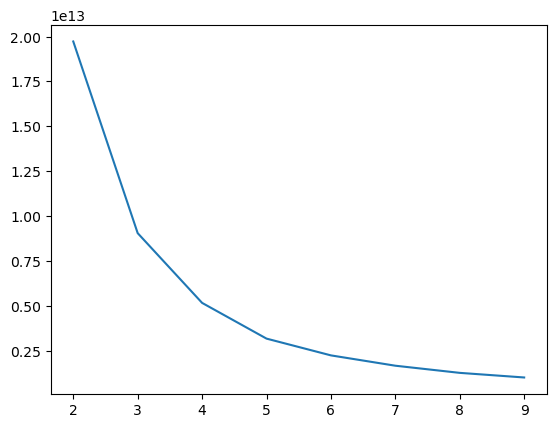

In [31]:
plt.plot(range(2,10), wcss);

Biggest change is at 3, this means that 3 clusters would suit this dataframe best.

4 and 5 also hold an exaggerated bend.

## Visualisations

In [32]:
db_new_df = pd.DataFrame(data=db_new)

In [33]:
scaler = StandardScaler()

In [34]:
numeric_columns = db_new_df.select_dtypes(include='number').columns
db_new_df[numeric_columns] = scaler.fit_transform(db_new_df[numeric_columns])

In [35]:
selected_columns = list(db_new_df.columns[1:6]) # Adjust column indices as needed
db_new2 = db_new_df[selected_columns]

In [36]:
new_df = pd.DataFrame(data=db_new2, columns=selected_columns)

In [37]:
new_df

,Quantity,Price,countries_encoded
0,-0.016384,0.105183,0.292243
1,-0.016384,0.099429,0.292243
2,-0.016384,0.099429,0.292243
3,0.355355,-0.034359,0.292243
4,0.107529,-0.058814,0.292243
...,...,...,...
525456,-0.119645,-0.009903,0.292243
525457,-0.129971,0.013114,0.292243
525458,-0.129971,0.013114,0.292243
525459,-0.119645,0.013114,0.292243


In [38]:
new_df.describe()

,Quantity,Price,countries_encoded
count,4.076950e+05,4.076950e+05,4.076950e+05
mean,1.488815e-14,-3.250159e-15,-2.886835e-14
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.299712e-01,-9.477873e-02,-5.154375e+00
25%,-1.196451e-01,-5.881435e-02,2.922427e-01
50%,-8.866686e-02,-3.867430e-02,2.922427e-01
75%,-1.638426e-02,1.311441e-02,2.922427e-01
max,1.976249e+02,3.150539e+02,6.126319e-01


In [39]:
y_pred = kmeans.fit_predict(new_df)

In [40]:
kmeans.cluster_centers_

array([[-4.27825987e-02, -7.18001511e-03,  2.78368407e-01],
       [ 4.15867055e-02,  1.28458177e-02, -3.41864429e+00],
       [-1.29971208e-01,  2.91532223e+02,  2.92242681e-01],
       [ 5.03378277e+01, -8.89128648e-02, -1.90471229e+00],
       [ 1.18974551e+02, -8.61712536e-02, -2.13737592e+00],
       [-1.29971208e-01,  3.73656651e+01, -1.99053084e+00],
       [ 1.79868344e+01, -8.25878936e-02, -7.74507945e-01],
       [-1.29971208e-01,  2.00102235e+02, -1.46989829e+00],
       [ 3.28775966e+00, -5.98178455e-02, -1.05858025e-01]])

In [41]:
y_pred==0

array([ True,  True,  True, ...,  True,  True,  True])

In [42]:
new_df[y_pred==0]

,Quantity,Price,countries_encoded
0,-0.016384,0.105183,0.292243
1,-0.016384,0.099429,0.292243
2,-0.016384,0.099429,0.292243
3,0.355355,-0.034359,0.292243
4,0.107529,-0.058814,0.292243
...,...,...,...
525456,-0.119645,-0.009903,0.292243
525457,-0.129971,0.013114,0.292243
525458,-0.129971,0.013114,0.292243
525459,-0.119645,0.013114,0.292243


In [43]:
new_df.iloc[:,0]

0        -0.016384
1        -0.016384
2        -0.016384
3         0.355355
4         0.107529
            ...   
525456   -0.119645
525457   -0.129971
525458   -0.129971
525459   -0.119645
525460   -0.119645
Name: Quantity, Length: 407695, dtype: float64

In [44]:
new_df

,Quantity,Price,countries_encoded
0,-0.016384,0.105183,0.292243
1,-0.016384,0.099429,0.292243
2,-0.016384,0.099429,0.292243
3,0.355355,-0.034359,0.292243
4,0.107529,-0.058814,0.292243
...,...,...,...
525456,-0.119645,-0.009903,0.292243
525457,-0.129971,0.013114,0.292243
525458,-0.129971,0.013114,0.292243
525459,-0.119645,0.013114,0.292243


In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to your data
kmeans.fit(new_df)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

In [46]:
def plotFeatures(col1, col2):
    plt.scatter(
        new_df[y_pred==0].iloc[:,col1],
        new_df[y_pred==0].iloc[:,col2],
        s=50,
        c='red'
    )
    plt.scatter(
        new_df[y_pred==1].iloc[:,col1],
        new_df[y_pred==1].iloc[:,col2],
        s=50,
        c='blue'
    )
    plt.scatter(
        new_df[y_pred==2].iloc[:,col1],
        new_df[y_pred==2].iloc[:,col2],
        c='green'
    )
    plt.scatter(
        kmeans.cluster_centers_[:,col1],
        kmeans.cluster_centers_[:,col2],
        s=200,
        c='yellow'
    )
    xmin, xmax = plt.xlim()  # Get the current limits of the x-axis
    plt.xlim(min(xmin, 0), xmax)
    
    plt.xlabel(new_df.columns[col1])
    plt.ylabel(new_df.columns[col2])
    plt.show();

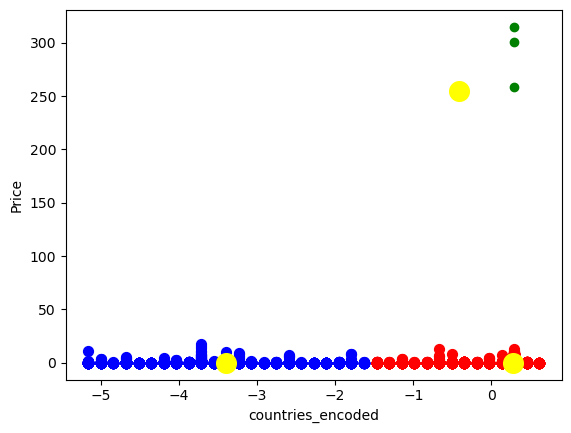

In [47]:
plotFeatures(2, 1)

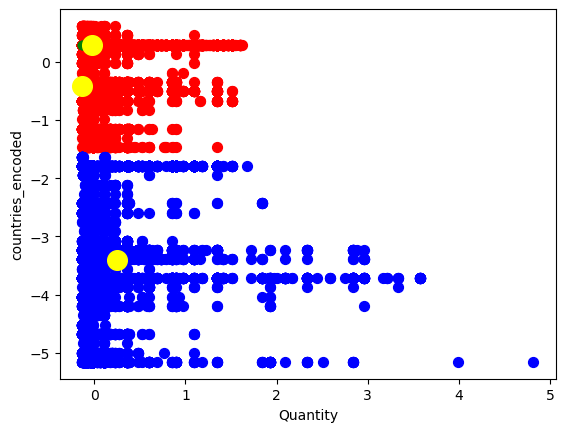

In [48]:
plotFeatures(0, 2)

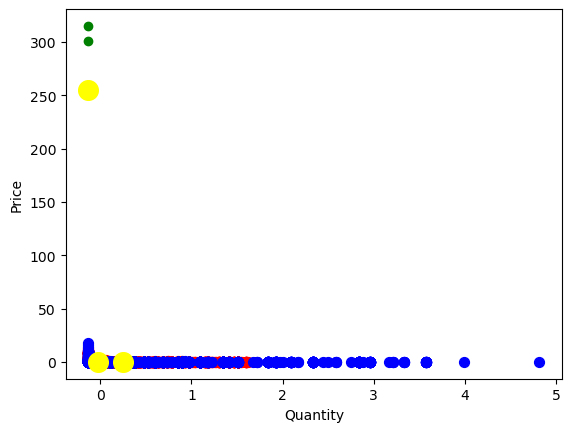

In [49]:
plotFeatures(0, 1)

## Silhouette Score

In [50]:
silhouette_score(new_df, y_pred)

0.9217820231646697

Excellant Silhouette score. Showing that the clusters are well separated from each other as well as how similiar the points are within their own clusters are. The score is between -1 and +1. 0.92 is a great score.

## Market Basket Analysis (MBA)

In [51]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [52]:
db.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,countries_encoded
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,35
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,35
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,35
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,35
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,35


where to sell products:

In [53]:
db.dropna(axis=0, subset=['Invoice'], inplace=True)

In [56]:
db['Description'] = db['Description'].str.strip()
db = db[~(db['Invoice'].astype(str).str.contains('C') | db['Invoice'].isna())]
db = db[~(db['Invoice'].astype(str).str.contains('A') | db['Invoice'].isna())]

In [57]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [58]:
basket = (db[db['Country'] =="United Kingdom"]        
          .groupby(['Invoice', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Invoice'))

In [59]:
basket

Description,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [61]:
basket_sets

Description,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

In [63]:
frequent_itemsets_ranked = frequent_itemsets.sort_values(by='support', ascending=False)

In [64]:
print("frequent_itemsets_ranked:")
print(frequent_itemsets_ranked)

frequent_itemsets_ranked:
      support                               itemsets
169  0.165777   (WHITE HANGING HEART T-LIGHT HOLDER)
136  0.085954             (REGENCY CAKESTAND 3 TIER)
7    0.071534        (ASSORTED COLOUR BIRD ORNAMENT)
155  0.070285       (STRAWBERRY CERAMIC TRINKET BOX)
60   0.064551             (HOME BUILDING BLOCK WORD)
..        ...                                    ...
92   0.020154         (MEMO BOARD RETROSPOT  DESIGN)
146  0.020098      (SET OF 36 TEATIME PAPER DOILIES)
142  0.020098   (ROUND SNACK BOXES SET OF4 WOODLAND)
159  0.020098                  (TEA TIME OVEN GLOVE)
147  0.020041  (SET OF 72 RETRO SPOT PAPER  DOILIES)

[204 rows x 2 columns]


In [65]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape 

(40, 10)

In [66]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.046951,0.058022,0.023504,0.500605,8.627837,0.020780,1.886237,0.927650
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 60 PINK PAISLEY CAKE CASES),0.058022,0.046951,0.023504,0.405088,8.627837,0.020780,1.602000,0.938553
2,(PACK OF 72 RETRO SPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.056659,0.058022,0.024129,0.425852,7.339483,0.020841,1.640653,0.915630
3,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETRO SPOT CAKE CASES),0.058022,0.056659,0.024129,0.415851,7.339483,0.020841,1.614898,0.916954
4,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.165777,0.071534,0.021517,0.129795,1.814445,0.009658,1.066950,0.538066
5,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.071534,0.165777,0.021517,0.300794,1.814445,0.009658,1.193100,0.483450
6,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE TEA AND SYMPATHY),0.043715,0.044567,0.020722,0.474026,10.636297,0.018774,1.816503,0.947398
7,(HOT WATER BOTTLE TEA AND SYMPATHY),(CHOCOLATE HOT WATER BOTTLE),0.044567,0.043715,0.020722,0.464968,10.636297,0.018774,1.787342,0.948242
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.048654,0.055921,0.027592,0.567095,10.140917,0.024871,2.180796,0.947489
9,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.055921,0.048654,0.027592,0.493401,10.140917,0.024871,1.877906,0.954782


In [67]:
rules.sort_values("leverage", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.165777,0.053707,0.039173,0.236301,4.399802,0.030270,1.239092,0.926272
30,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.053707,0.165777,0.039173,0.729387,4.399802,0.030270,3.082714,0.816573
33,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.070285,0.043375,0.033099,0.470921,10.857068,0.030050,1.808095,0.976529
32,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.043375,0.070285,0.033099,0.763089,10.857068,0.030050,3.924322,0.949059
39,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.055638,0.045021,0.030828,0.554082,12.307180,0.028323,2.141600,0.972875
38,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.045021,0.055638,0.030828,0.684741,12.307180,0.028323,2.995518,0.962060
12,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.052856,0.064551,0.029125,0.551020,8.536212,0.025713,2.083500,0.932120
13,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.064551,0.052856,0.029125,0.451187,8.536212,0.025713,1.725806,0.943773
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.048654,0.055921,0.027592,0.567095,10.140917,0.024871,2.180796,0.947489
9,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.055921,0.048654,0.027592,0.493401,10.140917,0.024871,1.877906,0.954782


In [68]:
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
169,0.165777,(WHITE HANGING HEART T-LIGHT HOLDER)
136,0.085954,(REGENCY CAKESTAND 3 TIER)
7,0.071534,(ASSORTED COLOUR BIRD ORNAMENT)
155,0.070285,(STRAWBERRY CERAMIC TRINKET BOX)
60,0.064551,(HOME BUILDING BLOCK WORD)
...,...,...
92,0.020154,(MEMO BOARD RETROSPOT DESIGN)
146,0.020098,(SET OF 36 TEATIME PAPER DOILIES)
142,0.020098,(ROUND SNACK BOXES SET OF4 WOODLAND)
159,0.020098,(TEA TIME OVEN GLOVE)


In [69]:
rules.iloc[0, 1]

frozenset({'60 TEATIME FAIRY CAKE CASES'})

In [70]:
rules[ rules["consequents"] != frozenset({'PACK OF 60 PINK PAISLEY CAKE CASES'}) ].sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
32,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.043375,0.070285,0.033099,0.763089,10.857068,0.030050,3.924322,0.949059
30,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.053707,0.165777,0.039173,0.729387,4.399802,0.030270,3.082714,0.816573
38,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.045021,0.055638,0.030828,0.684741,12.307180,0.028323,2.995518,0.962060
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.048654,0.055921,0.027592,0.567095,10.140917,0.024871,2.180796,0.947489
39,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.055638,0.045021,0.030828,0.554082,12.307180,0.028323,2.141600,0.972875
12,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.052856,0.064551,0.029125,0.551020,8.536212,0.025713,2.083500,0.932120
24,(LUNCH BAG PINK RETROSPOT),(LUNCH BAG RED SPOTTY),0.038208,0.053764,0.020382,0.533432,9.921730,0.018327,2.028079,0.934933
27,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG SUKI DESIGN),0.046951,0.049449,0.023504,0.500605,10.123593,0.021182,1.903403,0.945619
0,(PACK OF 60 PINK PAISLEY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.046951,0.058022,0.023504,0.500605,8.627837,0.020780,1.886237,0.927650
9,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.055921,0.048654,0.027592,0.493401,10.140917,0.024871,1.877906,0.954782


## FP-Growth Algorithm

In [71]:
from mlxtend.frequent_patterns import fpgrowth

In [72]:
db

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,countries_encoded
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,35
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,35
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,35
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,35
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,35
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,35
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,35
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,35
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,35


In [73]:
country = 'United Kingdom'
filtered_db = db[db['Country'] == country]

In [74]:
transactions = filtered_db.groupby('Invoice')['Description'].apply(list).values.tolist()

In [75]:
transactions = [[str(item) for item in transaction] for transaction in transactions]

In [76]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

In [77]:
encoded_db = pd.DataFrame(te_array, columns=te.columns_)

In [91]:
freq_items_fpg = fpgrowth(encoded_db, min_support=0.005, use_colnames=True)

In [92]:
print(freq_items_fpg)

       support                                           itemsets
0     0.070285                   (STRAWBERRY CERAMIC TRINKET BOX)
1     0.018394                              (SAVE THE PLANET MUG)
2     0.017259                              (WHITE CHERRY LIGHTS)
3     0.016634                        (PINK DOUGHNUT TRINKET POT)
4     0.012547              (15CM CHRISTMAS GLASS BALL 20 LIGHTS)
...        ...                                                ...
2867  0.007153  (HAND WARMER SCOTTY DOG DESIGN, HAND WARMER RE...
2868  0.006813  (HAND WARMER UNION JACK, HAND WARMER RED RETRO...
2869  0.006813  (HAND WARMER BIRD DESIGN, HAND WARMER RED RETR...
2870  0.005791  (HAND WARMER UNION JACK, HAND WARMER BIRD DESI...
2871  0.006131  (HAND WARMER SCOTTY DOG DESIGN, HAND WARMER BI...

[2872 rows x 2 columns]


In [93]:
freq_items_fpg.shape

(2872, 2)

In [94]:
rules_fpg = association_rules(freq_items_fpg, min_threshold = 1)

In [95]:
rules_fpg.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN T...",(CHILDS GARDEN TROWEL PINK),0.005734,0.011866,0.005734,1.0,84.277512,0.005666,inf,0.993833
1,"(CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN T...",(CHILDS GARDEN TROWEL PINK),0.005166,0.011866,0.005166,1.0,84.277512,0.005105,inf,0.993266
2,"(CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...",(CHILDS GARDEN TROWEL PINK),0.005053,0.011866,0.005053,1.0,84.277512,0.004993,inf,0.993153
